*Creado por:*
    
*Isabel Maniega*

# Convolutional Neural Networks (CNN)

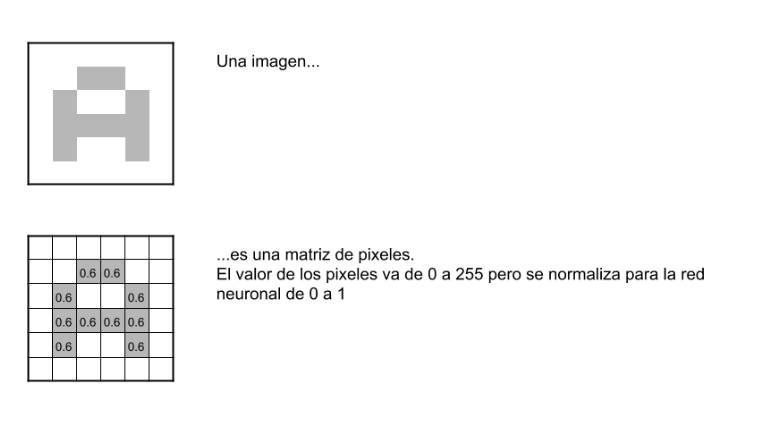

In [1]:
from IPython import display

display.Image("./CNN_info/CNN_2.png")

**Pixeles y neuronas**

Para comenzar, la red toma como entrada los pixeles de una imagen. Si tenemos una imagen con apenas 28×28 pixeles de alto y ancho, eso equivale a  784 neuronas. Y eso es si sólo tenemos 1 color (escala de grises). Si tuviéramos una imagen a color, necesitaríamos 3 canales (red, green, blue) y entonces usaríamos 28x28x3 = 2352 neuronas de entrada. Esa es nuestra capa de entrada. Para continuar con el ejemplo, supondremos que utilizamos la imagen con 1 sólo color.

Recuerda que como entrada nos conviene normalizar los valores. Los colores de los pixeles tienen valores que van de 0 a 255, haremos una transformación de cada pixel: “valor/255” y nos quedará siempre un valor entre 0 y 1.

# Pasos

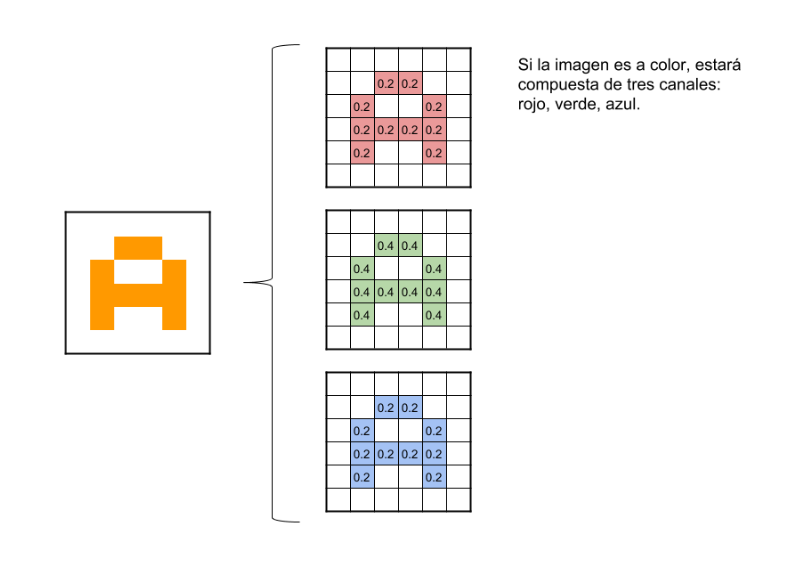

In [2]:
display.Image("./CNN_info/CNN_3.png")

**Convolution**

Estas consisten en tomar “grupos de pixeles cercanos” de la imagen de entrada e ir operando matemáticamente (producto escalar) contra una pequeña matriz que se llama kernel. Ese kernel supongamos de tamaño 3×3 pixels “recorre” todas las neuronas de entrada (de izquierda-derecha, de arriba-abajo) y genera una nueva matriz de salida, que en definitiva será nuestra nueva capa de neuronas ocultas. NOTA: si la imagen fuera a color, el kernel realmente sería de 3x3x3 es decir: un filtro con 3 kernels de 3×3; luego  esos 3 filtros se suman (y se le suma una unidad bias) y conformarán 1 salida (cómo si fuera 1 solo canal).

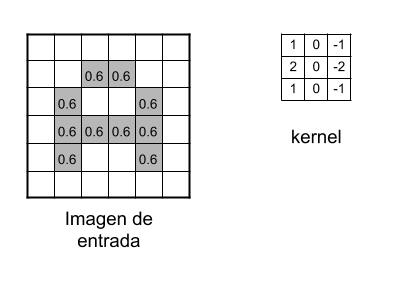

In [3]:
display.Image("./CNN_info/CNN_4.png")

El kernel tomará inicialmente valores aleatorios(1) y se irán ajustando mediante backpropagation. (1)Una mejora es hacer que siga una distribución normal siguiendo simetrías, pero sus valores son aleatorios.

UN DETALLE: en realidad, no aplicaremos 1 sólo kernel, si no que tendremos muchos kernel (su conjunto se llama filtros). Por ejemplo en esta primer convolución podríamos tener 32 filtros, con lo cual realmente obtendremos 32 matrices de salida (este conjunto se conoce como “feature mapping”), cada una de 28x28x1 dando un total del 25.088 neuronas para nuestra PRIMER CAPA OCULTA de neuronas. ¿No les parecen muchas para una imagen cuadrada de apenas 28 pixeles? Imaginen cuántas más serían si tomáramos una imagen de entrada de 224x224x3 (que aún es considerado un tamaño pequeño)…

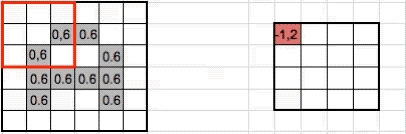

In [4]:
display.Image("./CNN_info/cnn_kernel.gif")

Aquí vemos al kernel realizando el producto matricial con la imagen de entrada y desplazando de a 1 pixel de izquierda a derecha y de arriba-abajo y va generando una nueva matriz que compone al mapa de features

A medida que vamos desplazando el kernel y vamos obteniendo una “nueva imagen” filtrada por el kernel. En esta primer convolución y siguiendo con el ejemplo anterior, es como si obtuviéramos 32 “imágenes filtradas nuevas”. Estas imágenes nuevas lo que están “dibujando” son ciertas características de la imagen original. Esto ayudará en el futuro a poder distinguir un objeto de otro (por ej. gato ó perro).

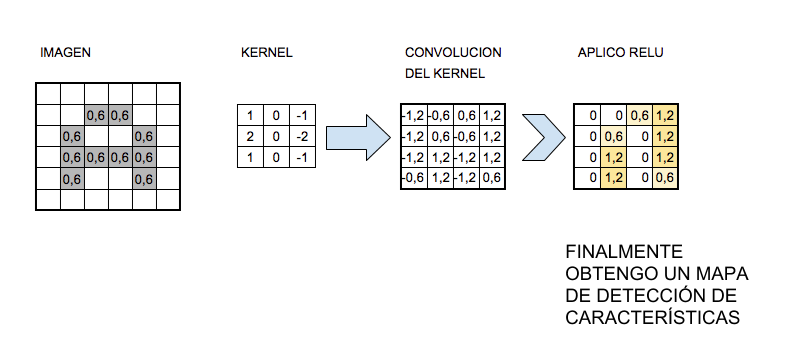

In [5]:
display.Image("./CNN_info/CNN_5.png")

**Activación**

La función de activación más utilizada para este tipo de redes neuronales es la llamada ReLu por Rectifier Linear Unit  y consiste en f(x)=max(0,x).

Ahora viene un paso en el que reduciremos la cantidad de neuronas antes de hacer una nueva convolución.
Para reducir el tamaño de la próxima capa de neuronas haremos un proceso de subsampling en el que reduciremos el tamaño de nuestras imágenes filtradas pero en donde deberán prevalecer las características más importantes que detectó cada filtro. Hay diversos tipos de subsampling, el “más usado”: Max-Pooling

**Max-Pooling**

Vamos a intentar explicarlo con un ejemplo: supongamos que haremos Max-pooling de tamaño 2×2. Esto quiere decir que recorreremos cada una de nuestras 32 imágenes de características obtenidas anteriormente de 28x28px de izquierda-derecha, arriba-abajo PERO en vez de tomar de a 1 pixel, tomaremos de “2×2” (2 de alto por 2 de ancho = 4 pixeles) e iremos preservando el valor “más alto” de entre esos 4 pixeles (por eso lo de “Max”). En este caso, usando 2×2, la imagen resultante es reducida “a la mitad”y quedará de 14×14 pixeles. Luego de este proceso de subsamplig nos quedarán  32 imágenes de 14×14, pasando de haber tenido 25.088 neuronas a  6272, son bastantes menos y -en teoría- siguen almacenando la información más importante para detectar características deseadas.

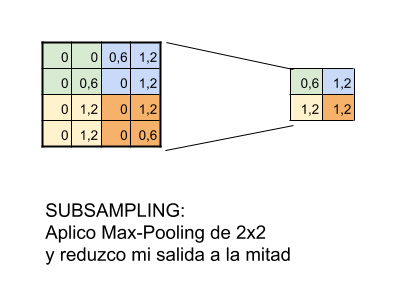

In [6]:
display.Image("./CNN_info/CNN_6.png")

La primer convolución es capaz de detectar características primitivas como lineas ó curvas. A medida que hagamos más capas con las convoluciones, los mapas de características serán capaces de reconocer formas más complejas, y el conjunto total de capas de convoluciones podrá “ver”.

Así realizaremos varias convoluciones hasta analizar la imagen, así en este ejemplo empezamos con una imagen de 28x28px e hicimos 3 convoluciones. Si la imagen inicial hubiese sido mayor (de 224x224px) aún hubiéramos podido seguir haciendo convoluciones.

# Crea un clasificador para MNIST

In [1]:
# el test espera clasificar 10 clases, 0 a 9
# No uses lambda layers en tu modelo
# La "accuracy" y "validation_accuracy" deseada es: > 91%

**EJEMPLO 1: Todo en un mismo archivo**

2025-07-06 14:53:13.963126: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-06 14:53:14.248667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751806394.348632    5350 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751806394.380831    5350 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751806394.602364    5350 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/home/isabelmaniega/Documentos/IA_Python/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751806401.028063    5350 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1751806402.811309    5454 service.cc:152] XLA service 0x74e54c002850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751806402.811336    5454 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-07-06 14:53:22.856627: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1751806403.125950    5454 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-07-06 14:53:24.971920: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_244', 4 bytes spill stores, 4 bytes spill loads



  21/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2051 - loss: 2.1502

I0000 00:00:1751806406.786802    5454 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.9076 - loss: 0.2902 - val_accuracy: 0.9834 - val_loss: 0.0527
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9850 - loss: 0.0487 - val_accuracy: 0.9878 - val_loss: 0.0367
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9821 - val_loss: 0.0541
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9936 - loss: 0.0217 - val_accuracy: 0.9908 - val_loss: 0.0336
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9952 - loss: 0.0148 - val_accuracy: 0.9902 - val_loss: 0.0372
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9879 - val_loss: 0.0382
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9970 - loss: 0.0085 - val_accuracy: 0.9896 - val_loss: 0.0392
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9974 - loss: 0.0077

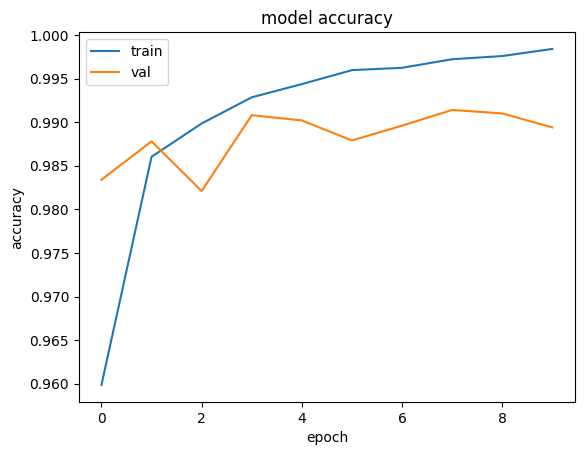

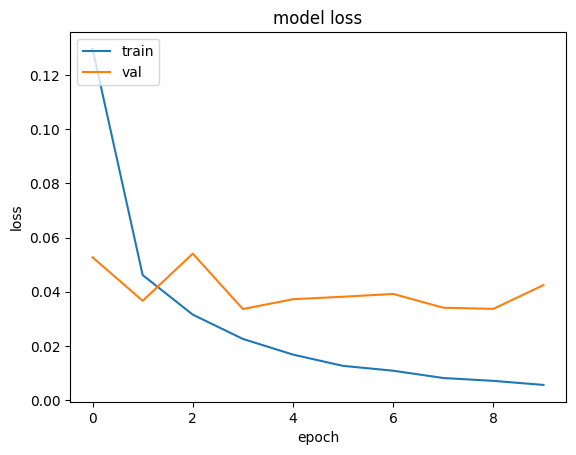

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt

def classification_model_1():
    mnist = tf.keras.datasets.mnist

    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    training_images=training_images.reshape(60000, 28, 28, 1)
    training_images=training_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images=test_images/255.0

    # DEFINE YOUR MODEL HERE
    # End with 10 Neuron Dense, activated by softmax
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    # COMPILE MODEL HERE
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    # TRAIN YOUR MODEL HERE
    history = model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=10, verbose=1)

    # ploteamos 
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    return model



# el código de abajo es para guardar el modelo como un archivo .h5

if __name__ == '__main__':
    model_1 = classification_model_1()
    model_1.save("model_1.h5")

**como se puede ver, resuelve el problema, pero tiene mejora**

*Creado por:*
    
*Isabel Maniega*